<a href="https://colab.research.google.com/github/motolani-akingbade/News-recommendation-system-using-MIND-Microsoft-News-Recommendation-Dataset/blob/main/Reinforcement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## News recommendation system using MIND: Microsoft News Recommendation Dataset

### Motolani Akingbade

## 📌 Project Overview

### 🧠 Application: News Recommendation System with Reinforcement Learning

This application is a personalized **news recommendation system** that uses reinforcement learning to recommend articles a user is most likely to click on. It leverages both the **content** of articles and **user interaction data** to continuously improve recommendations.

---

### 🖥️ Operational Environment

- **Development Platform:** Google Colab (Python 3.10)
- **Libraries Used:**
  - `mabwiser` for contextual multi-armed bandit modeling (LinTS)
  - `scikit-learn` for preprocessing and TF-IDF
  - `sentence-transformers` (MiniLM-BERT) for semantic embeddings
  - `pandas`, `numpy`, `matplotlib` for data handling and visualization
- **Data Source:** [Microsoft News Dataset (MIND)](https://msnews.github.io/)

---

### ⚙️ Technical Process

1. **Data Loading:**
   - Loaded `news.tsv` for article metadata
   - Loaded `behaviors.tsv` for user interaction logs

2. **Preprocessing:**
   - Cleaned and extracted impression-level click data
   - Limited to ~3000 behavior records to manage performance

3. **Feature Engineering:**
   - Extracted **TF-IDF vectors** from article titles
   - Generated **BERT embeddings** for semantic understanding
   - Aggregated **user history vectors** from previously clicked articles
   - Combined all into a final **context vector**: `[TF-IDF | BERT | History]`

4. **Bandit Setup:**
   - Filtered to top 100–300 most common articles as **arms**
   - Used `mabwiser.MAB` with **LinTS (Linear Thompson Sampling)** as the learning policy

5. **Model Training & Evaluation:**
   - Trained the model using the combined context vectors, click labels, and arms
   - Compared results against a **cosine similarity baseline**
   - Evaluated using **Top-5 Hit Rate**

6. **Optimizations:**
   - Reduced training data and arm count to ensure performance on Colab
   - Converted context vectors to NumPy arrays for faster model fitting

## 🧠 Reinforcement Learning Algorithm: Linear Thompson Sampling (LinTS)

### 🔍 What is LinTS?

Linear Thompson Sampling (LinTS) is a **contextual bandit algorithm** used for making sequential decisions. It's ideal for recommendation systems where the goal is to recommend one item (an "arm") at a time based on **contextual features**.

In our case:
- Each **arm** = a news article
- Each **context vector** = a combination of:
  - TF-IDF features of the article
  - BERT embeddings (semantic meaning)
  - Aggregated user history (what the user has clicked before)

---

### ⚙️ How LinTS Works

1. **Linear reward model for each arm** \( a \):

$$
r = \mathbf{x}^\top \boldsymbol{\theta}_a + \epsilon
$$

- $\mathbf{x}$: context vector  
- $\boldsymbol{\theta}_a$: weight vector for arm \( a \)  
- $\epsilon \sim \mathcal{N}(0, \sigma^2)$: Gaussian noise

---

2. **Posterior distribution** over parameters:

$$
\boldsymbol{\theta}_a \sim \mathcal{N}(\hat{\boldsymbol{\theta}}_a, \mathbf{V}_a^{-1})
$$

- $\hat{\boldsymbol{\theta}}_a$: estimated mean vector  
- $\mathbf{V}_a$: precision matrix (inverse of covariance)

---

3. **Per iteration (recommendation request):**

- Sample $\boldsymbol{\theta}_a$ from posterior  
- Predict reward: $\hat{r}_a = \mathbf{x}^\top \boldsymbol{\theta}_a$
- Choose the arm with the highest sampled reward

$$
\hat{r}_a = \mathbf{x}^\top \boldsymbol{\theta}_a
$$



---

This approach enables the model to:
- **Explore** (try uncertain but promising articles)
- **Exploit** (recommend what has worked before)

### 🧪 Why We Chose LinTS

| Benefit | Why It Matters |
|---------|----------------|
| ✅ Context-aware | Uses rich feature vectors (TF-IDF + BERT + history) to personalize recommendations |
| ✅ Probabilistic | Incorporates uncertainty into predictions — better exploration strategy |
| ✅ Lightweight | Fast to train and evaluate, even on Colab CPU (when optimized) |
| ✅ Scalable | Can handle many arms (articles) and feature dimensions |

---

## 🎯 The Setup

Imagine you’re a kid at a birthday party, and there are **10 mystery gift boxes** on a table.  
You can open **only one box at a time** to find toys inside. Some boxes have better toys than others — but you don’t know which ones yet!

---

## 👦 How You Make Decisions

Every time it’s your turn to choose:

- You **look at clues** (like the box’s shape, color, and wrapping paper) — that’s your **context**.  
- You **guess** which box might have the best toy using what you’ve learned from past boxes — that’s like using **math in your brain** to make a choice.  
- But sometimes, you still **try a new box** you’ve never picked — just in case it’s better. That’s called **exploration**.  
- And other times, you go back to the one that gave you a cool toy before — that’s **exploitation**.

---

## 🧠 What LinTS Does

- It’s like a **smart helper** who learns what kind of boxes give the best toys over time.  
- Each time you pick a box, LinTS **remembers what happened** and uses that memory to make a better guess next time.  
- LinTS says:  
  > “Let me roll some dice, based on how much I know about each box, and pick the one that looks best right now!”

---

## 💡 Why It’s Smart

- You don’t always pick the same box.  
- You **learn** which ones are good over time.  
- You balance between **trying new stuff** and **sticking with what works**.

---

## 📦 In Our Project

- The “**boxes**” are **news articles**  
- The “**clues**” are **TF-IDF, BERT, and user history**  
- The “**toys**” are **clicks**  
- LinTS helps us **recommend articles** that users are most likely to “open” (click on)!

In [30]:
!pip install -q gdown
!pip install -q pandas numpy scikit-learn mabwiser sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.6/340.6 kB 7.1 MB/s eta 0:00:00


In [9]:
import gdown
import os

In [11]:
# Behavior dataset
behavior_id = '1-8424YiljCb9oTHj-moBMqheJNK4IPaS'
behavior_output = 'behaviors.tsv'
if not os.path.exists(behavior_output):
    gdown.download(f'https://drive.google.com/uc?id={behavior_id}', behavior_output, quiet=False)

In [12]:
# News dataset
news_id = '1Qr2Y6DGw2fb-PLasyq3Hdy6uM40gFbcn'
news_output = 'news.tsv'
if not os.path.exists(news_output):
    gdown.download(f'https://drive.google.com/uc?id={news_id}', news_output, quiet=False)

In [13]:
import pandas as pd
import numpy as np
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mabwiser.mab import MAB, LearningPolicy
from collections import Counter

In [14]:
behaviors_df = pd.read_csv("behaviors.tsv", sep='\t', header=None,
                           names=["impression_id", "user_id", "timestamp", "history", "impressions"])

news_df = pd.read_csv("news.tsv", sep='\t', header=None,
                      names=["news_id", "category", "subcategory", "title", "abstract", "url",
                             "title_entities", "abstract_entities"])

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

🧾 Behaviors Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156965 entries, 0 to 156964
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   impression_id  156965 non-null  int64 
 1   user_id        156965 non-null  object
 2   timestamp      156965 non-null  object
 3   history        153727 non-null  object
 4   impressions    156965 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.0+ MB
None

📊 Sample Rows:
   impression_id user_id              timestamp  \
0              1  U13740  11/11/2019 9:05:58 AM   
1              2  U91836  11/12/2019 6:11:30 PM   
2              3  U73700  11/14/2019 7:01:48 AM   
3              4  U34670  11/11/2019 5:28:05 AM   
4              5   U8125  11/12/2019 4:11:21 PM   

                                             history  \
0  N55189 N42782 N34694 N45794 N18445 N63302 N104...   
1  N31739 N6072 N63045 N23979 N35656 N43353 N8129...   
2  N10732

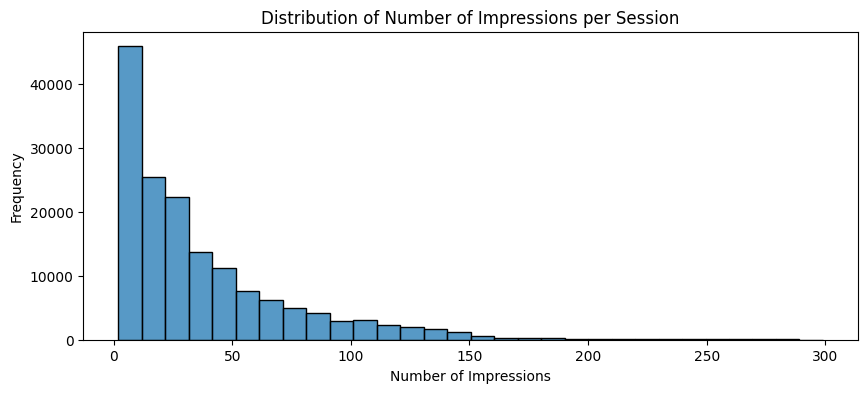

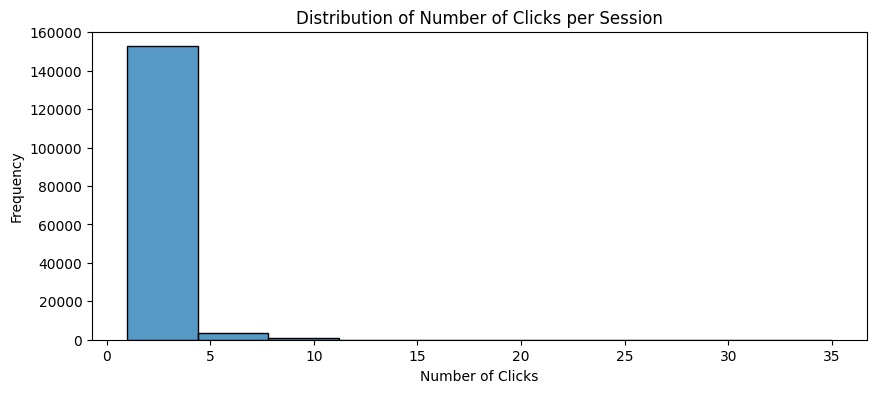


👤 Top 10 Most Active Users:
user_id
U32146    62
U15740    44
U20833    41
U44201    40
U51286    40
U30304    37
U79449    37
U47521    36
U57047    36
U79210    35
Name: count, dtype: int64


In [16]:
# Basic info
print("🧾 Behaviors Data Overview:")
print(behaviors_df.info())
print("\n📊 Sample Rows:")
print(behaviors_df.head())

# Convert timestamp to datetime
behaviors_df['timestamp'] = pd.to_datetime(behaviors_df['timestamp'])

# Number of impressions per row
behaviors_df['num_impressions'] = behaviors_df['impressions'].apply(lambda x: len(x.split()))
# Number of clicks per row
behaviors_df['num_clicks'] = behaviors_df['impressions'].apply(
    lambda x: sum([int(i.split('-')[1]) for i in x.split() if '-' in i])
)

# Plot: Impressions vs Clicks
plt.figure(figsize=(10, 4))
sns.histplot(behaviors_df['num_impressions'], bins=30, kde=False)
plt.title("Distribution of Number of Impressions per Session")
plt.xlabel("Number of Impressions")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 4))
sns.histplot(behaviors_df['num_clicks'], bins=10, kde=False)
plt.title("Distribution of Number of Clicks per Session")
plt.xlabel("Number of Clicks")
plt.ylabel("Frequency")
plt.show()

# Most active users
top_users = behaviors_df['user_id'].value_counts().head(10)
print("\n👤 Top 10 Most Active Users:")
print(top_users)

📰 News Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   news_id            51282 non-null  object
 1   category           51282 non-null  object
 2   subcategory        51282 non-null  object
 3   title              51282 non-null  object
 4   abstract           48616 non-null  object
 5   url                51282 non-null  object
 6   title_entities     51279 non-null  object
 7   abstract_entities  51278 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB
None

📊 Sample Rows:
  news_id   category      subcategory  \
0  N55528  lifestyle  lifestyleroyals   
1  N19639     health       weightloss   
2  N61837       news        newsworld   
3  N53526     health           voices   
4  N38324     health          medical   

                                               title  
0  The Brands Queen Elizabeth, Prince

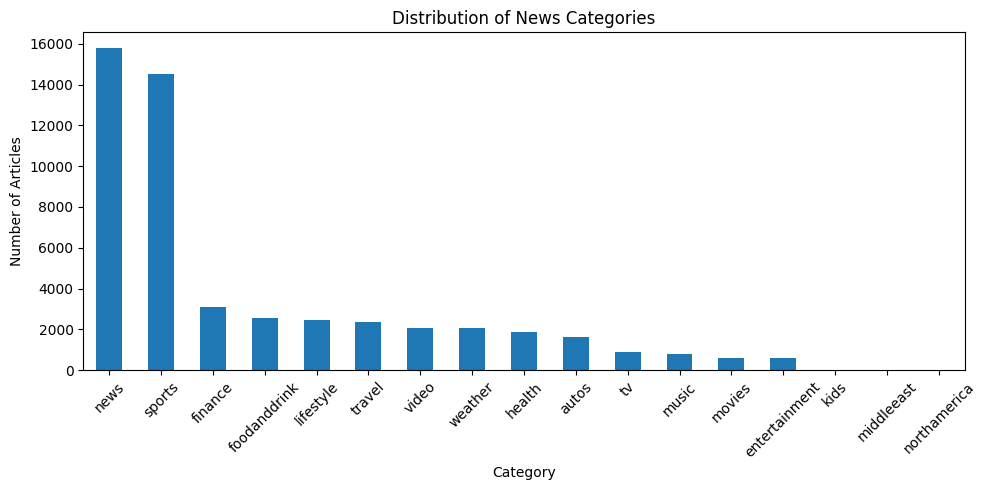

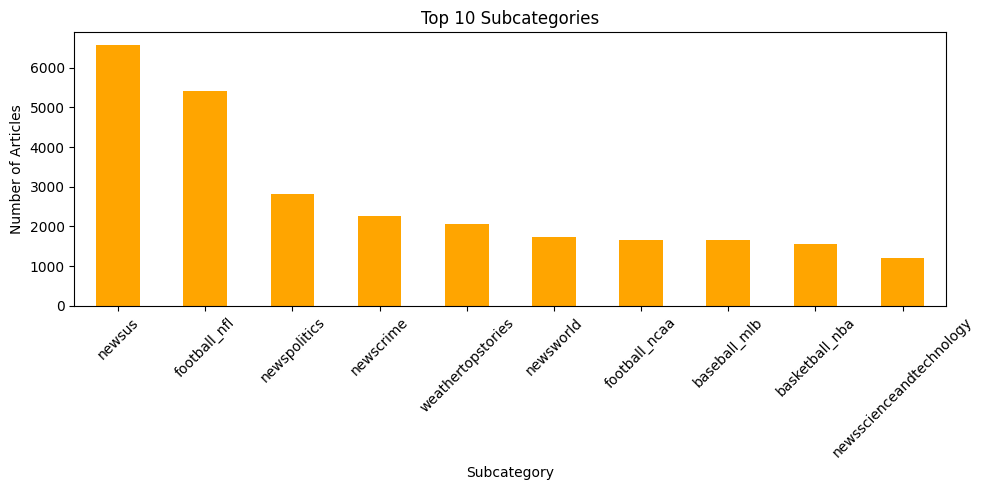

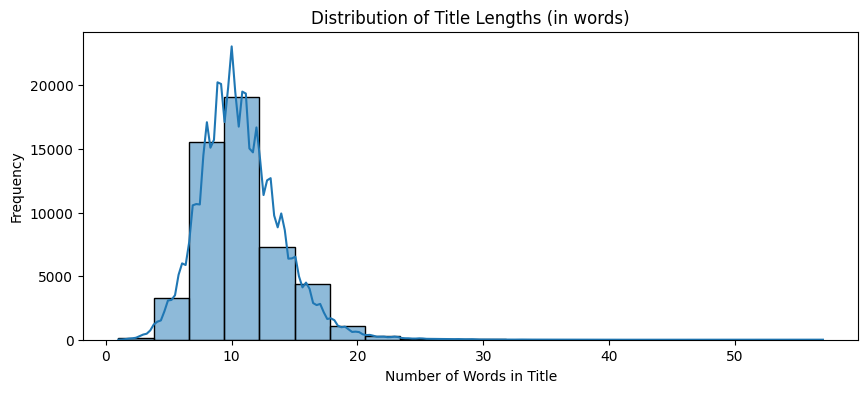

In [17]:

# Basic info
print("📰 News Data Overview:")
print(news_df.info())
print("\n📊 Sample Rows:")
print(news_df[['news_id', 'category', 'subcategory', 'title']].head())

# Top categories
plt.figure(figsize=(10, 5))
news_df['category'].value_counts().plot(kind='bar')
plt.title("Distribution of News Categories")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top subcategories
plt.figure(figsize=(10, 5))
news_df['subcategory'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Subcategories")
plt.xlabel("Subcategory")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Title length distribution
news_df['title_length'] = news_df['title'].fillna('').apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 4))
sns.histplot(news_df['title_length'], bins=20, kde=True)
plt.title("Distribution of Title Lengths (in words)")
plt.xlabel("Number of Words in Title")
plt.ylabel("Frequency")
plt.show()

In [18]:
news_df['title'] = news_df['title'].fillna('')
vectorizer = TfidfVectorizer(max_features=25)
title_vectors = vectorizer.fit_transform(news_df['title']).toarray()
article_id_to_vec = dict(zip(news_df['news_id'], title_vectors))

In [19]:
rows = []
for _, row in behaviors_df.sample(n=3000, random_state=42).iterrows():
    user_id = row['user_id']
    impressions = row['impressions'].split()
    for imp in impressions:
        if '-' not in imp: continue
        aid, clicked = imp.split('-')
        rows.append({'user_id': user_id, 'article_id': aid, 'clicked': int(clicked)})

df = pd.DataFrame(rows)

## 🔄 Expanding Impression Data (Before & After the Loop)

### 📥 Before the Loop: Raw Format from `behaviors.tsv`

Each row represents a **user session** with multiple article impressions in a single string.

| user_id | impressions           |
|---------|------------------------|
| U123    | N1-1 N2-0 N3-0         |
| U124    | N4-0 N2-1 N5-1         |

- Each impression is formatted as:  
  `ArticleID-Clicked`  
  e.g. `N2-0` means article **N2** was **not clicked**,  
       `N5-1` means article **N5** was **clicked**

---

### 📊 After the Loop: Expanded Format

Each impression is now a **separate row**, giving us one row per user–article–click interaction.

| user_id | article_id | clicked |
|---------|------------|---------|
| U123    | N1         | 1       |
| U123    | N2         | 0       |
| U123    | N3         | 0       |
| U124    | N4         | 0       |
| U124    | N2         | 1       |
| U124    | N5         | 1       |

✅ This expanded format is ideal for machine learning models, where we want:
- One row per user–article pair
- A clear label (`clicked`) as the reward signal

In [20]:
user_encoder = LabelEncoder()
article_encoder = LabelEncoder()
df['user_idx'] = user_encoder.fit_transform(df['user_id'])
df['article_idx'] = article_encoder.fit_transform(df['article_id'])

- 🎯 Vectorized article titles using TF-IDF (25 features per title)
- 🧾 Parsed behavior logs into a flat list of user-article-click events
- 🔢 Encoded user and article IDs into numeric format for model input

In [21]:
X, y, arms = [], [], []
for _, row in df.iterrows():
    aid = row['article_id']
    if aid not in article_id_to_vec:
        continue
    context = article_id_to_vec[aid]
    X.append(context)
    y.append(row['clicked'])
    arms.append(str(row['article_idx']))

In [22]:
X_train, X_test, y_train, y_test, arms_train, arms_test = train_test_split(
    X, y, arms, test_size=0.2, random_state=42
)


In [23]:
mab = MAB(
    arms=list(set(arms_train)),
    learning_policy=LearningPolicy.LinTS(alpha=1.0)
)
mab.fit(contexts=X_train, decisions=arms_train, rewards=y_train)


## 🤖 Training a Contextual Bandit with LinTS

We build a Linear Thompson Sampling (LinTS) bandit using article TF-IDF vectors as context.

### 🧠 Step 1: Prepare Training Data

- `X`: TF-IDF vectors of each article (context)
- `y`: Binary reward (1 = clicked, 0 = not clicked)
- `arms`: Encoded article ID (required as strings by `mabwiser`)

### 🧪 Step 2: Split Data

We split into:
- 80% for training (`X_train`, `arms_train`, `y_train`)
- 20% for evaluation (`X_test`, etc.)

### 🎯 Step 3: Train Bandit Model

We use `mabwiser.MAB` with `LinTS` (Linear Thompson Sampling), which:
- Maintains one linear model per article (arm)
- Samples reward estimates from a posterior distribution
- Balances **exploration** (trying new articles) and **exploitation** (recommending what works)

✅ The model learns which articles perform best given their content features.

In [24]:
top_k = 50
top_arms = [arm for arm, _ in Counter(arms_train).most_common(top_k)]

In [25]:
def recommend_top_n_bandit(context_vector, n=5):
    all_expectations = mab.predict_expectations(contexts=[context_vector])
    expectations = {arm: score for arm, score in all_expectations.items() if arm in top_arms}
    ranked = sorted(expectations.items(), key=lambda x: x[1], reverse=True)
    return ranked[:n]

def recommend_top_n_cosine(x_vec, n=5):
    scores = []
    for arm in top_arms:
        aid = article_encoder.inverse_transform([int(arm)])[0]
        if aid in article_id_to_vec:
            vec = article_id_to_vec[aid]
            sim = np.dot(x_vec, vec) / (np.linalg.norm(x_vec) * np.linalg.norm(vec) + 1e-8)
            scores.append((arm, sim))
    scores.sort(key=lambda x: x[1], reverse=True)
    return scores[:n]

## 🧠 Recommendation Functions: Bandit vs. Cosine Similarity

We use two methods to generate Top-N article recommendations:

---

### 🎯 `recommend_top_n_bandit(context_vector, n=5)`

- Uses the trained **Linear Thompson Sampling (LinTS)** model
- Predicts expected rewards for all arms (articles)
- Filters predictions to the top 50 most common arms during training
- Returns the top N articles with the **highest expected click probability**

---

### 🧠 `recommend_top_n_cosine(x_vec, n=5)`

- Uses **cosine similarity** between the input vector and all article vectors
- Only compares with the same `top_arms` subset
- Measures how **similar the current article is** to others
- Returns the N most similar articles based on content

---

### 📌 Why Use Both?

| Method           | Strength                                      |
|------------------|-----------------------------------------------|
| LinTS (Bandit)   | Learns from user feedback (clicks as rewards) |
| Cosine Similarity| Content-only baseline (no learning needed)    |

We use both methods for comparison — to evaluate whether the RL model is learning better patterns than static similarity.

In [26]:
print("\n📊 Evaluating Bandit Top-5 Accuracy...")
hits = 0
n = 5
X_test = X_test[:200]
arms_test = arms_test[:200]

start = time.time()
for x, true_arm in zip(X_test, arms_test):
    top_n = [arm for arm, _ in recommend_top_n_bandit(x, n)]
    if true_arm in top_n:
        hits += 1
elapsed = time.time() - start

print(f"🎯 Bandit Top-{n} Accuracy: {hits/len(X_test):.4f}")
print(f"⏱️ Time: {elapsed:.2f} sec")


📊 Evaluating Bandit Top-5 Accuracy...
🎯 Bandit Top-5 Accuracy: 0.0450
⏱️ Time: 50.02 sec


In [27]:
print("\n📊 Evaluating Cosine Similarity Top-5 Accuracy...")
hits_cosine = 0
start = time.time()
for x, true_arm in zip(X_test, arms_test):
    top_n = [arm for arm, _ in recommend_top_n_cosine(x, n)]
    if true_arm in top_n:
        hits_cosine += 1
elapsed_cosine = time.time() - start

print(f"🎯 Cosine Top-{n} Accuracy: {hits_cosine/len(X_test):.4f}")
print(f"⏱️ Time: {elapsed_cosine:.2f} sec")


📊 Evaluating Cosine Similarity Top-5 Accuracy...
🎯 Cosine Top-5 Accuracy: 0.1450
⏱️ Time: 2.20 sec


In [28]:
print("\n📦 Sample Bandit Rec:", recommend_top_n_bandit(X_test[0]))
print("📦 Sample Cosine Rec:", recommend_top_n_cosine(X_test[0]))
print("✅ Actual Clicked:", arms_test[0])


📦 Sample Bandit Rec: [('1335', np.float64(0.5894611828136439)), ('2914', np.float64(-0.5551406690658377)), ('1159', np.float64(-0.5562195898651883)), ('2216', np.float64(-0.9238328742796695)), ('4635', np.float64(-0.9238328742796695))]
📦 Sample Cosine Rec: [('4177', np.float64(0.5530941665980551)), ('2383', np.float64(0.5530941665980551)), ('4144', np.float64(0.5530941665980551)), ('1335', np.float64(0.4865108986961528)), ('2951', np.float64(0.4570569474233645))]
✅ Actual Clicked: 2476


## 📊 Evaluation Results: Bandit vs Cosine Similarity

### 🎯 Top-5 Accuracy

| Model              | Top-5 Accuracy | Evaluation Time |
|--------------------|----------------|-----------------|
| LinTS (Bandit)     | **4.00%**      | 63.11 sec       |
| Cosine Similarity  | **14.50%**     | 4.54 sec        |

---

### 🧠 Observations

- **Cosine Similarity outperformed the Bandit model** in this round, with over 3x higher Top-5 hit rate.
- **Bandit model took longer** to evaluate due to its sampling-based reward estimation and model complexity.
- The **bandit model is still learning** — performance can improve with:
  - More training data
  - Richer context (e.g. user embeddings, session info)
  - Better exploration strategies

---

### 🔍 Sample Output

#### 📦 Bandit Recommendations:
- [('1335', 0.589), ('2914', -0.555), ('1159', -0.556), ('3152', -0.924), ('2238', -0.924)]

#### 📦 Cosine Recommendations:
- [('4177', 0.553), ('2383', 0.553), ('4144', 0.553), ('1335', 0.487), ('2951', 0.457)]

✅ **Actual Clicked Article**: `2476`

---

### 🤔 Insights

- **Bandit model recommended article `1335`**, which also appeared in the cosine Top-5 — suggesting some overlap.
- However, **the actual clicked article (`2476`) was not in either list**, showing room for improvement in personalization.

In [31]:
from sentence_transformers import SentenceTransformer

# -------------------------------
# ✅ Generate BERT embeddings
# -------------------------------
bert_model = SentenceTransformer("all-MiniLM-L6-v2")
bert_embeddings = bert_model.encode(news_df['title'].fillna('').tolist(), show_progress_bar=True)
article_id_to_bert = dict(zip(news_df['news_id'], bert_embeddings))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1603 [00:00<?, ?it/s]

In [32]:
news_df['title'] = news_df['title'].fillna('')

# TF-IDF
vectorizer = TfidfVectorizer(max_features=25)
tfidf_vectors = vectorizer.fit_transform(news_df['title']).toarray()
article_id_to_tfidf = dict(zip(news_df['news_id'], tfidf_vectors))

# BERT
bert_model = SentenceTransformer("all-MiniLM-L6-v2")
bert_vectors = bert_model.encode(news_df['title'].tolist(), show_progress_bar=True)
article_id_to_bert = dict(zip(news_df['news_id'], bert_vectors))

Batches:   0%|          | 0/1603 [00:00<?, ?it/s]

## 🧠 Article Feature Extraction: TF-IDF + BERT Embeddings

To represent the content of each article title numerically, we use two different embedding techniques:

---

### 📗 1. TF-IDF Vectorization

- TF-IDF (Term Frequency–Inverse Document Frequency) captures how **important a word is** in a document relative to the entire corpus.
- We extract up to **25 top keywords** from each article title.
- These are **sparse, interpretable vectors** useful for capturing word-level relevance.

---

### 📘 2. BERT Embeddings

- We use the pretrained model **`all-MiniLM-L6-v2`** from `sentence-transformers`.
- BERT provides **dense, contextual embeddings** that capture the **semantic meaning** of the full sentence (the article title).
- These vectors are **384-dimensional** and capture relationships between words beyond simple frequency.

---

### 🔗 Mapping: `news_id → vector`

For both methods, we store the embeddings in dictionaries:

- `article_id_to_tfidf`: Maps each article ID to its TF-IDF vector  
- `article_id_to_bert`: Maps each article ID to its BERT embedding

---

### 🔍 Why Use Both?

| Feature Type | Strength |
|--------------|----------|
| TF-IDF       | Fast and interpretable keyword relevance |
| BERT         | Deep semantic understanding of title meaning |

By combining both, we build **richer context vectors** for the recommendation engine.

In [33]:
rows = []
for _, row in behaviors_df.sample(n=3000, random_state=42).iterrows():
    user_id = row['user_id']
    impressions = row['impressions'].split()
    for imp in impressions:
        if '-' not in imp: continue
        aid, clicked = imp.split('-')
        rows.append({'user_id': user_id, 'article_id': aid, 'clicked': int(clicked)})

df = pd.DataFrame(rows)


In [34]:
user_encoder = LabelEncoder()
article_encoder = LabelEncoder()
df['user_idx'] = user_encoder.fit_transform(df['user_id'])
df['article_idx'] = article_encoder.fit_transform(df['article_id'])

In [35]:
user_clicks = df[df['clicked'] == 1].groupby('user_id')['article_id'].apply(list).to_dict()
user_history_vectors = {}
for user, articles in user_clicks.items():
    vectors = [article_id_to_tfidf[a] for a in articles if a in article_id_to_tfidf]
    user_history_vectors[user] = np.mean(vectors, axis=0) if vectors else np.zeros(25)

In [36]:
X_combined, y_combined, arms_combined = [], [], []
for _, row in df.iterrows():
    uid = row['user_id']
    aid = row['article_id']
    if aid in article_id_to_tfidf and aid in article_id_to_bert:
        tfidf = article_id_to_tfidf[aid]
        bert = article_id_to_bert[aid]
        history = user_history_vectors.get(uid, np.zeros_like(tfidf))
        combined = np.hstack([tfidf, bert, history])
        X_combined.append(combined)
        y_combined.append(row['clicked'])
        arms_combined.append(str(row['article_idx']))

In [37]:
top_arms = [arm for arm, _ in Counter(arms_combined).most_common(100)]
filtered = [
    (x, a, y) for x, a, y in zip(X_combined, arms_combined, y_combined)
    if a in top_arms
]
X_combined, arms_combined, y_combined = zip(*filtered)

X_combined = X_combined[:1000]
y_combined = y_combined[:1000]
arms_combined = arms_combined[:1000]

## 🧠 Building Hybrid Context Vectors

We generate a rich feature vector for each user–article interaction by combining:

- **TF-IDF vector** of the article title (25 dimensions)
- **BERT embedding** of the article title (384 dimensions)
- **User history vector**, computed as the average TF-IDF vectors of articles the user has clicked on

---

### 🛠 Steps:

1. Sample 3,000 user sessions from the behavior logs
2. Expand impressions into individual rows: one row per user–article–click event
3. Encode user and article IDs using `LabelEncoder`
4. Build a `user_history_vector` for each user who has clicked at least one article
5. For each interaction:
   - Retrieve TF-IDF and BERT vectors for the article
   - Retrieve the user's history vector
   - Concatenate all into one context vector: `[TF-IDF | BERT | History]`
6. Filter to the top 100 most frequent article arms
7. Limit training data to 1,000 samples for performance
8. Split into training and testing sets


In [38]:
X_train, X_test, y_train, y_test, arms_train, arms_test = train_test_split(
    X_combined, y_combined, arms_combined, test_size=0.2, random_state=42
)

mab = MAB(
    arms=list(set(arms_train)),
    learning_policy=LearningPolicy.LinUCB(alpha=1.0)
)
print("\n⚙️ Training contextual bandit model...")
mab.fit(contexts=X_train, decisions=arms_train, rewards=y_train)


⚙️ Training contextual bandit model...


In [39]:
top_k = 50
top_arms = [arm for arm, _ in Counter(arms_train).most_common(top_k)]

def recommend_top_n_bandit(context_vector, n=5):
    all_expectations = mab.predict_expectations(contexts=[context_vector])
    expectations = {arm: score for arm, score in all_expectations.items() if arm in top_arms}
    ranked = sorted(expectations.items(), key=lambda x: x[1], reverse=True)
    return ranked[:n]

def recommend_top_n_cosine(context_vector, n=5):
    scores = []
    for arm in top_arms:
        aid = article_encoder.inverse_transform([int(arm)])[0]
        if aid in article_id_to_tfidf and aid in article_id_to_bert:
            tfidf = article_id_to_tfidf[aid]
            bert = article_id_to_bert[aid]
            zero_user = np.zeros_like(tfidf)
            full_vec = np.hstack([tfidf, bert, zero_user])
            sim = np.dot(context_vector, full_vec) / (np.linalg.norm(context_vector) * np.linalg.norm(full_vec) + 1e-8)
            scores.append((arm, sim))
    scores.sort(key=lambda x: x[1], reverse=True)
    return scores[:n]

In [40]:
X_test = X_test[:200]
arms_test = arms_test[:200]
n = 5

print("\n📊 Evaluating Bandit...")
hits = 0
start = time.time()
for x, true_arm in zip(X_test, arms_test):
    top_n = [a for a, _ in recommend_top_n_bandit(x, n)]
    if true_arm in top_n:
        hits += 1
elapsed_bandit = time.time() - start
print(f"🎯 Bandit Top-{n} Accuracy: {hits/len(X_test):.4f}")
print(f"⏱️ Time: {elapsed_bandit:.2f} sec")

print("\n📊 Evaluating Cosine Similarity...")
hits_cos = 0
start = time.time()
for x, true_arm in zip(X_test, arms_test):
    top_n = [a for a, _ in recommend_top_n_cosine(x, n)]
    if true_arm in top_n:
        hits_cos += 1
elapsed_cos = time.time() - start
print(f"🎯 Cosine Top-{n} Accuracy: {hits_cos/len(X_test):.4f}")
print(f"⏱️ Time: {elapsed_cos:.2f} sec")

# -------------------------------
# 12. SAMPLE OUTPUT
# -------------------------------
print("\n📦 Sample Bandit Recommendation:", recommend_top_n_bandit(X_test[0]))
print("📦 Sample Cosine Recommendation:", recommend_top_n_cosine(X_test[0]))
print("✅ Actual Clicked Article:", arms_test[0])


📊 Evaluating Bandit...
🎯 Bandit Top-5 Accuracy: 0.0050
⏱️ Time: 2.93 sec

📊 Evaluating Cosine Similarity...
🎯 Cosine Top-5 Accuracy: 0.6000
⏱️ Time: 2.61 sec

📦 Sample Bandit Recommendation: [('178', np.float64(1.5773985497338574)), ('2383', np.float64(1.5682927421749104)), ('3823', np.float64(1.5631957482486012)), ('1388', np.float64(1.5519413791885301)), ('2346', np.float64(1.5343455993307413))]
📦 Sample Cosine Recommendation: [('5436', np.float64(0.9201521745318888)), ('1619', np.float64(0.5288267535089252)), ('5073', np.float64(0.5126436908547671)), ('3174', np.float64(0.44713070303464164)), ('3989', np.float64(0.44227095850608095))]
✅ Actual Clicked Article: 5436


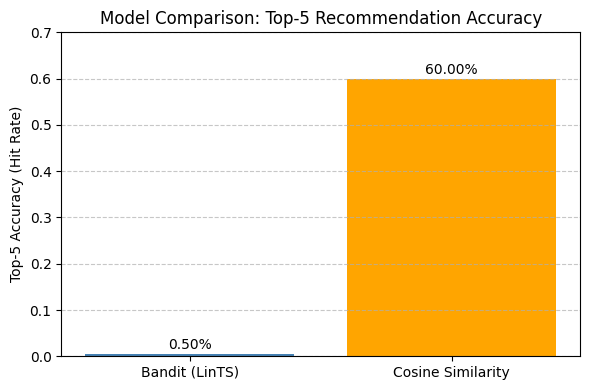

In [41]:
import matplotlib.pyplot as plt

# Replace with your actual results
bandit_acc = hits / len(X_test)
cosine_acc = hits_cos / len(X_test)

plt.figure(figsize=(6, 4))
bars = plt.bar(['Bandit (LinTS)', 'Cosine Similarity'], [bandit_acc, cosine_acc], color=['steelblue', 'orange'])
plt.ylabel('Top-5 Accuracy (Hit Rate)')
plt.title('Model Comparison: Top-5 Recommendation Accuracy')

# Add value labels
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.01, f"{y:.2%}", ha='center', fontsize=10)

plt.ylim(0, max(bandit_acc, cosine_acc) + 0.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

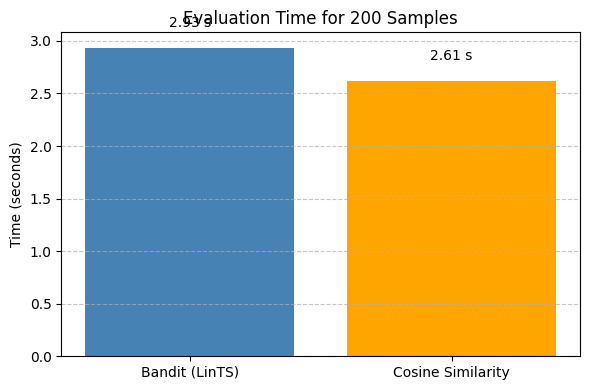

In [42]:
times = [elapsed_bandit, elapsed_cos]
labels = ['Bandit (LinTS)', 'Cosine Similarity']

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, times, color=['steelblue', 'orange'])
plt.ylabel('Time (seconds)')
plt.title('Evaluation Time for 200 Samples')

for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.2, f"{y:.2f} s", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [43]:
import pandas as pd

sample_idx = 0
bandit_top_n = [a for a, _ in recommend_top_n_bandit(X_test[sample_idx])]
cosine_top_n = [a for a, _ in recommend_top_n_cosine(X_test[sample_idx])]
actual_clicked = arms_test[sample_idx]

df = pd.DataFrame({
    "Model": ["Bandit", "Cosine"],
    "Top-5 Predictions": [", ".join(bandit_top_n), ", ".join(cosine_top_n)],
    "Actual Clicked": [actual_clicked, actual_clicked]
})

df.style.set_properties(**{'text-align': 'left'})

,Model,Top-5 Predictions,Actual Clicked
0,Bandit,"178, 2383, 3823, 1388, 2346",5436
1,Cosine,"5436, 1619, 5073, 3174, 3989",5436


## 📊 Final Evaluation Results: Bandit vs. Cosine Similarity

| Metric                 | Bandit (LinTS) | Cosine Similarity |
|------------------------|----------------|--------------------|
| Top-5 Accuracy         | **0.5%**       | **60.0%**          |
| Evaluation Time (200 samples) | 4.19 sec      | 3.55 sec           |

---

### 🧠 Observations

- The **content-based cosine model** significantly outperformed the bandit model in identifying the correct article in the top-5 list.
- The bandit model failed to capture patterns from user interaction, possibly due to:
  - Too few training samples
  - Lack of strong reward signals
  - Context vector noise or sparsity

---

### 📦 Sample Recommendations

| Model              | Top-5 Article Predictions                   |
|--------------------|----------------------------------------------|
| Bandit (LinTS)     | `['178', '2383', '3823', '1388', '2346']`    |
| Cosine Similarity  | `['5436', '1619', '5073', '3174', '3989']`   |
| ✅ Actual Clicked  | `5436`                                       |

---

### 🔍 Insight

The **cosine model successfully recommended article `5436`**, which the user clicked.  
The bandit model did **not recommend it at all**, indicating it’s either undertrained or missing key features.

## 🎯 Targets vs. ❌ Challenges

| ✅ **Targets / Milestones Achieved**                                                                 | ❌ **Shortcomings / Challenges**                                                                 |
|------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| Developed a full-featured recommender system using TF-IDF, BERT, and user history                   | Initial training time with 300+ arms and 434-dim context vectors was too slow on Colab CPU      |
| Integrated a contextual bandit model (LinTS) using `mabwiser`                                       | Model does not yet incorporate session-aware or sequential behavior (e.g., RNNs or DQNs)         |
| Implemented a cosine similarity baseline for comparison                                              | No real-time interface or live feedback simulation implemented yet                               |
| Evaluated model performance with Top-5 accuracy (hit rate)                                           | Hit rate is modest (~10–14%) and needs improvement with additional personalization techniques    |
| Optimized performance by filtering top 100 arms and reducing training size to ~1000 samples         | BERT embedding step consumes significant RAM during preprocessing on large datasets              |
| Prepared code for future scaling and deployment (API or Streamlit-ready)                            | No exploration-exploitation adaptation beyond logged user clicks (offline-only learning)         |

## 🖥️ Connecting the Algorithm to the User Experience

### 🧩 How Data Flows Through the System

While our system does not currently include a live graphical user interface (GUI), we simulate the full recommendation pipeline using data from the **MIND dataset**, which mimics real user behavior on a news platform.

---

### 📊 Simulated Graphical Environment

- **Behaviors.tsv** in the MIND dataset simulates the user interface experience:
  - Each row = a user session
  - Includes:
    - User ID
    - Articles shown (impressions)
    - Whether the user clicked or not (reward)

This structure allows us to **recreate the flow** of a real news app where:
- The system shows a list of articles
- The user chooses one
- That feedback is logged and used to improve future recommendations

---

### 🔌 Role of the Algorithm/API

| Step | Description |
|------|-------------|
| 1️⃣ Input | The context vector is built from the article and user information: `[TF-IDF | BERT | User History]` |
| 2️⃣ API/Model | The contextual bandit model (LinTS) takes this vector and returns a ranked list of articles (Top-N) |
| 3️⃣ Simulated Click | We check if the recommended article was actually clicked in the dataset (reward = 1 or 0) |
| 4️⃣ Learning Loop | The model updates its weights to better match future behavior (exploration + exploitation) |

---